### **Properties of mixed models**
**Assumptions**: 

The assumptions of generalised linear mixed models are a combination of the assumptions of GLMs and mixed models.

The observed y are independent, conditional on some predictors x
The response y come from a known distribution from the exponential family, with a known mean variance relationship
There is a straight line relationship between some known function (link) of the mean of y and the predictors x and random effects z
Random effects z are independent of y.
Random effects z are normally distributed

### **About the Dataset**

The data set that we are using is aimed to test the effect of water pollution on the abundance of some subtidal marine invertebrates by comparing samples from modified and pristine estuaries. We will analyse the counts and presence/absences of individual species, which require generalised linear mixed models.

We will use the package pymer4 for all our mixed effect modelling. It allows us to model both continuous and discrete data with one or more random effects. 

**Importing libraries**

In [ ]:
import os
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
!pip install pymer4
!pip install rpy2
#!pip install r-lme
import rpy2
from pymer4.simulate import simulate_lmm, simulate_lm
from pymer4.models import Lm, Lmer, Lm2
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from pymer4.stats import boot_func
import pylab 
import scipy.stats as stats


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from rpy2.robjects.packages import importr
utils = importr('utils')
utils.install_packages('lme4')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/minqa_1.2.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 53548 bytes (52 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f387bfe5fc8> [RTYPES.NILSXP]

**Loading Data**

In [ ]:
url = "http://environmentalcomputing.net/wp-content/uploads/2016/05/Estuaries.csv"
r = requests.get(url)

path_target = os.path.join(os.getcwd(), "Estuaries.csv")
with open(path_target, "wb") as f:
    f.write(r.content)

In [ ]:
df = pd.read_csv(path_target)

In [ ]:
df.head()

,Unnamed: 0,Modification,Estuary,Site,Hydroid,Total,Schizoporella.errata
0,1,Modified,JAK,1,0,44,15
1,2,Modified,JAK,1,0,42,8
2,3,Modified,JAK,2,0,32,9
3,4,Modified,JAK,2,0,44,14
4,5,Modified,JAK,3,1,42,6


**Counts of hydroids (the variable Hydroid)**


In [ ]:
print(list(df['Hydroid']))

[0, 0, 0, 0, 1, 1, 0, 0, 7, 5, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 1, 2, 2, 2]


In [ ]:
df['HydroidPres'] = df['Hydroid']>0
df['HydroidPres'] = df['HydroidPres'].astype(int)
print(list(df['HydroidPres']))

[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]


**Binary data**

Fitting a model for the presence or absence of hydroids

In [ ]:
formula = 'HydroidPres ~ Modification + (1|Estuary)'
lmer = Lmer(formula,family='binomial' ,data=df)
lmer.fit()


Formula: HydroidPres~Modification+(1|Estuary)

Family: binomial	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -27.641 	 AIC: 61.282

Random effects:

                Name    Var  Std
Estuary  (Intercept)  0.811  0.9

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-2.649,-4.673,-0.626,1.032,0.071,0.009,0.535,0.066,0.009,0.349,-2.566,0.010,*
ModificationPristine,2.925,0.587,5.263,1.193,18.636,1.799,193.037,0.949,0.643,0.995,2.452,0.014,*


In [ ]:
print(lmer.coefs)

                      Estimate    2.5_ci   97.5_ci        SE         OR  \
(Intercept)          -2.649113 -4.672625 -0.625600  1.032423   0.070714   
ModificationPristine  2.925070  0.587256  5.262884  1.192784  18.635532   

                      OR_2.5_ci  OR_97.5_ci      Prob  Prob_2.5_ci  \
(Intercept)            0.009348    0.534940  0.066044     0.009261   
ModificationPristine   1.799046  193.037363  0.949072     0.642735   

                      Prob_97.5_ci    Z-stat     P-val Sig  
(Intercept)               0.348509 -2.565917  0.010290   *  
ModificationPristine      0.994846  2.452305  0.014194   *  


**Plots**

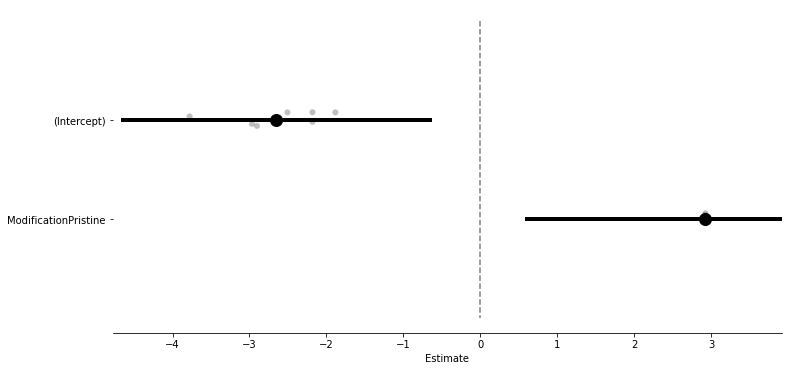

In [ ]:
lmer.plot_summary()
plt.show()

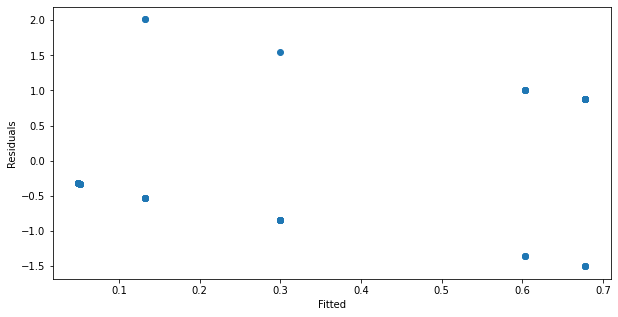

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(lmer.fits,lmer.residuals)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

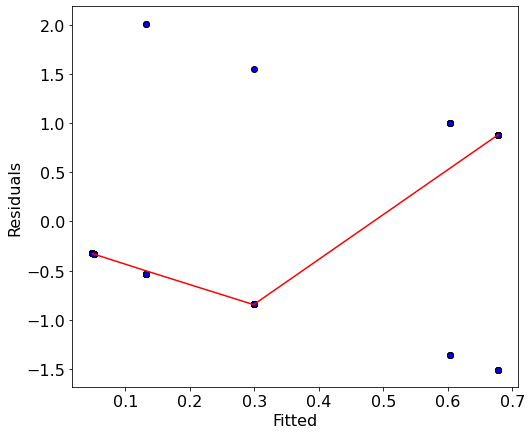

In [ ]:
smoothed = lowess(lmer.residuals,lmer.fits)
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(lmer.fits, lmer.residuals, edgecolors = 'k', color='blue')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

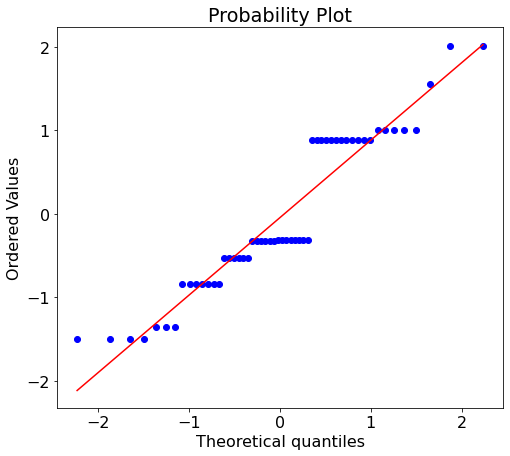

In [ ]:
stats.probplot(lmer.residuals, dist="norm", plot=pylab)
pylab.show()

**Hypothesis Testing**

In [ ]:
nBoot = 1000
lrStat = np.empty(shape=nBoot)

ft_null = Lmer("HydroidPres ~ 1 + (1|Estuary)", family="binomial", data=df) #null model
ft_alt = Lmer("HydroidPres ~ Modification + (1|Estuary)" ,family="binomial", data=df) #alternate model

ft_null.fit()
ft_alt.fit()

lrObs = 2*(ft_alt.logLike) - 2*(ft_null.logLike) #observed test stat

Formula: HydroidPres~1+(1|Estuary)

Family: binomial	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -30.540 	 AIC: 65.081

Random effects:

                Name    Var    Std
Estuary  (Intercept)  2.871  1.694

No random effect correlations specified

Fixed effects:

Formula: HydroidPres~Modification+(1|Estuary)

Family: binomial	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -27.641 	 AIC: 61.282

Random effects:

                Name    Var  Std
Estuary  (Intercept)  0.811  0.9

No random effect correlations specified

Fixed effects:



In [ ]:
df_c = df.copy()

for iBoot in range(nBoot):
  df_c["HydroidPresSim"] = ft_null.simulate(num_datasets=1)

  try:
    bNull = Lmer("HydroidPres ~ 1 + (1|Estuary)", family="binomial", data=df) #null model
    bAlt = Lmer("HydroidPresSim ~ Modification + (1|Estuary)" ,family="binomial", data=df_c) #alternate model

    bNull.fit()
    bAlt.fit()

    lrStat[iBoot] = 2*(bAlt.logLike) - 2*(bNull.logLike) #resampled test stat

  except:
    lrStat[iBoot] = np.nan

Streaming output truncated to the last 5000 lines.

Family: binomial	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -28.212 	 AIC: 62.425

Random effects:

                Name    Var    Std
Estuary  (Intercept)  0.469  0.685

No random effect correlations specified

Fixed effects:

Formula: HydroidPres~1+(1|Estuary)

Family: binomial	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -30.540 	 AIC: 65.081

Random effects:

                Name    Var    Std
Estuary  (Intercept)  2.871  1.694

No random effect correlations specified

Fixed effects:

Formula: HydroidPresSim~Modification+(1|Estuary)

Family: binomial	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -27.538 	 AIC: 61.076

Random effects:

                Name    Var    Std
Estuary  (Intercept)  0.849  0.922

No random effect correlations specified

Fixed effects:

Formula: HydroidPres~1+(1

In [ ]:
lrStat = lrStat[~np.isnan(lrStat)] # Drop NA

np.mean(lrStat > lrObs)

0.31462925851703405

The obtained p-value is greater than the threshold value of 0.05 and so, we can not reject the null hypothesis, which is that there is no effect of modification on the presence of hydroids.

**Count Data**



In [ ]:
formula = 'Hydroid ~ Modification + (1|Estuary)'
model = Lmer(formula ,family='poisson', data=df)
model.fit()

Formula: Hydroid~Modification+(1|Estuary)

Family: poisson	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -56.549 	 AIC: 119.098

Random effects:

                Name    Var   Std
Estuary  (Intercept)  0.624  0.79

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,Z-stat,P-val,Sig
(Intercept),-2.713,-4.515,-0.910,0.920,-2.950,0.003,**
ModificationPristine,2.705,0.757,4.652,0.993,2.722,0.006,**


**Plots**

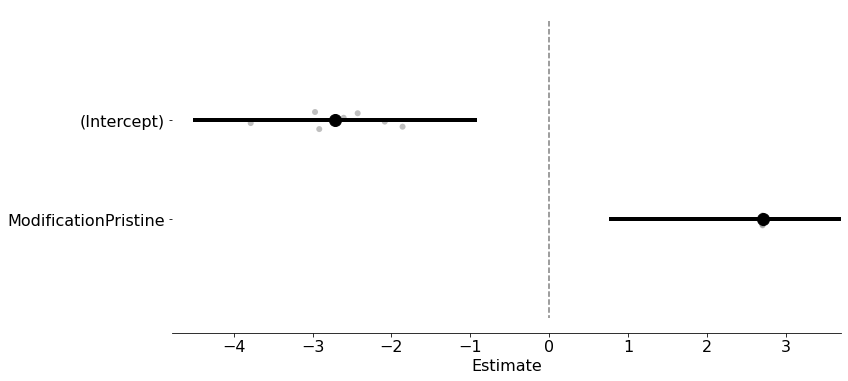

In [ ]:
model.plot_summary()
plt.show()

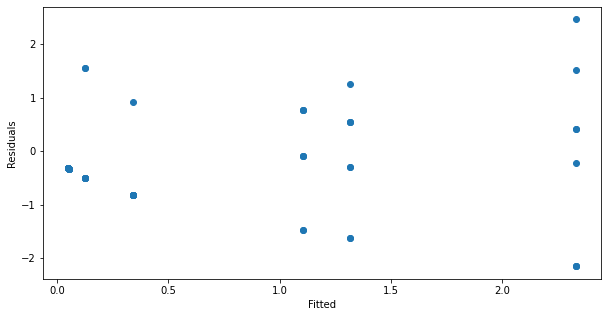

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(model.fits,model.residuals)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

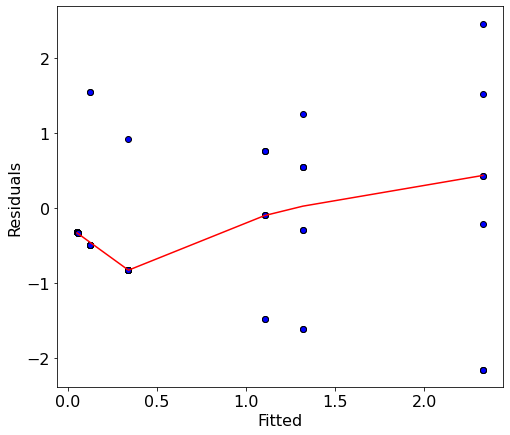

In [ ]:
smoothed = lowess(model.residuals,model.fits)
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(model.fits, model.residuals, edgecolors = 'k', color='blue')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

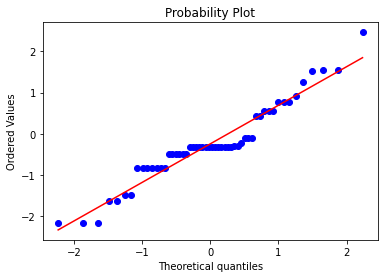

In [ ]:
stats.probplot(model.residuals, dist="norm", plot=pylab)
pylab.show()

**Hypothesis Testing**

In [ ]:
nBoot = 1000
lrStat = np.empty(shape=nBoot)

ft_null = Lmer("Hydroid ~ 1 + (1|Estuary)", family="poisson", data=df) #null model
ft_alt = Lmer("Hydroid ~ Modification + (1|Estuary)" ,family="poisson", data=df) #alternate model

ft_null.fit()
ft_alt.fit()

lrObs = 2*(ft_alt.logLike) - 2*(ft_null.logLike) #observed test stat

Formula: Hydroid~1+(1|Estuary)

Family: poisson	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -59.708 	 AIC: 123.417

Random effects:

                Name    Var    Std
Estuary  (Intercept)  2.357  1.535

No random effect correlations specified

Fixed effects:

Formula: Hydroid~Modification+(1|Estuary)

Family: poisson	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -56.549 	 AIC: 119.098

Random effects:

                Name    Var   Std
Estuary  (Intercept)  0.624  0.79

No random effect correlations specified

Fixed effects:



In [ ]:
df_c = df.copy()

for iBoot in range(nBoot):
  df_c["HydroidSim"] = ft_null.simulate(num_datasets=1)

  try:
    bNull = Lmer("HydroidSim ~ 1 + (1|Estuary)", family="poisson", data=df_c) #null model
    bAlt = Lmer("HydroidSim ~ Modification + (1|Estuary)" ,family="poisson", data=df_c) #alternate model

    bNull.fit()
    bAlt.fit()

    lrStat[iBoot] = 2*(bAlt.logLike) - 2*(bNull.logLike) #resampled test stat

  except:
    lrStat[iBoot] = np.nan

Streaming output truncated to the last 5000 lines.
Fixed effects:

unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 1 negative eigenvalues 

Formula: HydroidSim~Modification+(1|Estuary)

Family: poisson	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -42.225 	 AIC: 90.450

Random effects:

                Name    Var    Std
Estuary  (Intercept)  0.595  0.771

No random effect correlations specified

Fixed effects:

Formula: HydroidSim~1+(1|Estuary)

Family: poisson	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -59.544 	 AIC: 123.089

Random effects:

                Name    Var    Std
Estuary  (Intercept)  2.734  1.653

No random effect correlations specified

Fixed effects:

Formula: HydroidSim~Modification+(1|Estuary)

Family: poisson	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -57.730 	 AIC: 121.459

Ra

In [ ]:
lrStat = lrStat[~np.isnan(lrStat)] # Drop NA

np.mean(lrStat > lrObs)

0.32796780684104626

The obtained p-value is greater than the threshold value of 0.05 and so, we can not reject the null hypothesis, which is that there is no effect of modification on hydroid abundance.

**A non Poisson example**

In [ ]:
formula = 'Schizoporella.errata ~ Modification + (1|Estuary)'
model = Lmer(formula ,family='poisson', data=df)
model.fit()

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(model.fits,model.residuals)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

# Communicating results

For a simple mixed model with one random effect, one way that we can report results is a plot of the raw data with the model means superimposed.

In [ ]:
fit_pois = Lmer("Hydroid ~ Modification + (1|Estuary)", family="poisson", data=df)
fit_pois.fit()

Formula: Hydroid~Modification+(1|Estuary)

Family: poisson	 Inference: parametric

Number of observations: 54	 Groups: {'Estuary': 7.0}

Log-likelihood: -56.549 	 AIC: 119.098

Random effects:

                Name    Var   Std
Estuary  (Intercept)  0.624  0.79

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,Z-stat,P-val,Sig
(Intercept),-2.713,-4.515,-0.910,0.920,-2.950,0.003,**
ModificationPristine,2.705,0.757,4.652,0.993,2.722,0.006,**


In [ ]:
means = fit_pois.fits
df["Means"] = np.array(means)

means_df = df.groupby(by="Estuary")["Means"].mean().reset_index()

In [ ]:
import plotly.express as px

fig = px.box(df, x="Estuary", y="Hydroid", color="Modification", points=False)

fig.add_scatter(x=means_df.Estuary, 
                y=means_df.Means, 
                mode="markers", 
                name="Model Means",
                marker=dict(color="Red"),
                marker_symbol="diamond")

fig.show()